**Segment anything - deleting from an image - SAM, inpaiting, resizing**

In [1]:
!pip install simple-lama-inpainting segment-anything
%load_ext autoreload
%autoreload 2
!pip install scipy
!pip install matplotlib
%reload_ext autoreload
!pip install segment-anything

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [12]:
import tqdm

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from random import random
import time

In [14]:
from utils import cut 

In [15]:
#!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [16]:
from os import path
import math
from PIL import Image

from simple_lama_inpainting import SimpleLama

import scipy
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# modify to where you store your project data including utils
datadir = "CS445_Group_Project/Project_Files"

# can change this to your output directory of choice
!mkdir "images"
!mkdir "images/outputs"

A subdirectory or file images already exists.
A subdirectory or file images/outputs already exists.


In [17]:
from segment_anything import sam_model_registry

# Path to the model checkpoint
sam_checkpoint = sam_checkpoint = "C:\\Users\\Manso\\CS445_Group_Project\\sam_vit_h_4b8939 (2).pth"

model_type = "vit_h"

# Check if CUDA is available, otherwise use CPU
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"

# Load the model
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

print("Loaded on", device)


c:\users\manso\inpaint-anything\segment_anything\segment_anything\modeling\tiny_vit_sam.py:657: UserWarning: Overwriting tiny_vit_5m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
c:\users\manso\inpaint-anything\segment_anything\segment_anything\modeling\tiny_vit_sam.py:657: UserWarning: Overwriting tiny_vit_11m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
c:\users\manso\inpaint-anything\segment_anything\segment_anything\modeling\tiny_vit_sam.py:657: UserWarning: Overwriting tiny_vit_21m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_21m_224. This is because the name being registered conflicts with an existing

Loaded on cpu


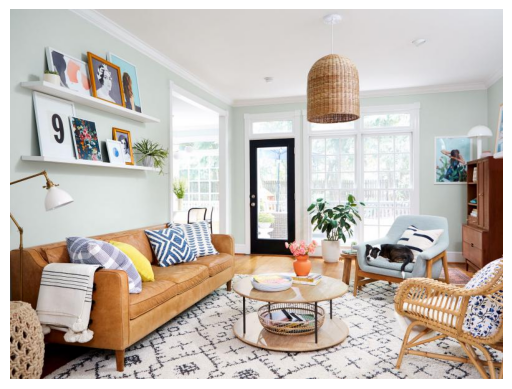

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = r"Project_Files\room.jpeg"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')  # Hide axes ticks if you want
plt.show()


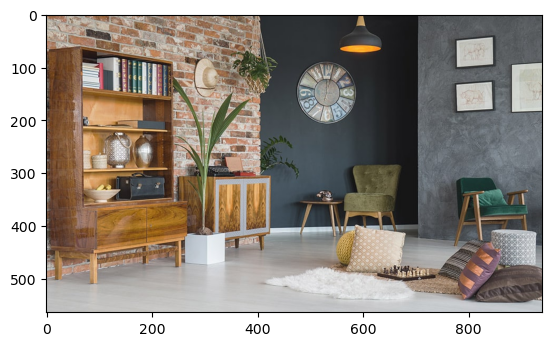

In [19]:
room4 = r"Project_Files\room4.jpg"
#image_path = "/content/final/room.jpeg"

room4 = Image.open(room4)

plt.imshow(room4)
# plt.axis('off')  # Hide axes ticks if you want
plt.show()

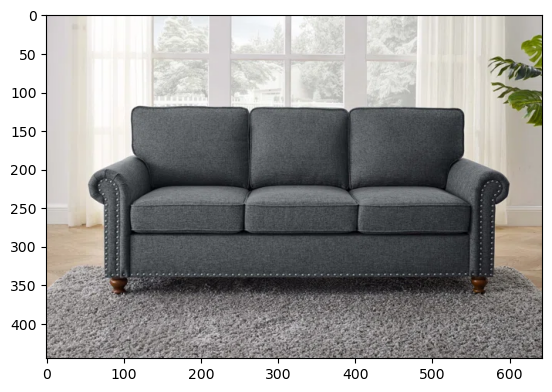

In [20]:
couch10_path = r"Project_Files\better_sofa.jpg"

couch10 = Image.open(couch10_path)

plt.imshow(couch10)
# plt.axis('off')  # Hide axes ticks if you want
plt.show()

In [21]:
#room.jpeg
width, height = image.size

In [22]:
#room4.jpg
width_room4, height_room4 = room4.size
widthc, heightc = room4.size

In [23]:
#better_sofa.jpg
width_c10, height_c10 = couch10.size

In [24]:
#room.jpeg
x, y = 520, 130

normalized_point = np.array([[x / width, y / height]])

point_grids = [normalized_point]

from segment_anything import SamAutomaticMaskGenerator

mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=None,
    point_grids=point_grids,
    pred_iou_thresh=0.5,  # Lowered from 0.88
    stability_score_thresh=0.8
)

In [25]:
#room4.jpg
xc, yc = 535, 140

normalized_point_room4 = np.array([[xc / widthc, yc / heightc]])

point_grids_room4 = [normalized_point_room4]

mask_generator_room4 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=None,
    point_grids=point_grids_room4,
    pred_iou_thresh=0.5,  # Lowered from 0.88
    stability_score_thresh=0.8
)

In [26]:
#room4.jpg
xt, yt = 300, 445

normalized_point_room4_table = np.array([[xt / widthc, yt / heightc]])

point_grids_room4_table = [normalized_point_room4_table]

mask_generator_room4_table = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=None,
    point_grids=point_grids_room4_table,
    pred_iou_thresh=0.5,  # Lowered from 0.88
    stability_score_thresh=0.8
)

In [27]:
#better_sofa.jpg
x10, y10 = 250, 250

normalized_point_c10 = np.array([[x10 / width_c10, y10 / height_c10]])

point_grids_c10 = [normalized_point_c10]

mask_generator_c10 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=None,
    point_grids=point_grids_c10,
    pred_iou_thresh=0.5,  # Lowered from 0.88
    stability_score_thresh=0.8
)

In [28]:
#room.jpeg
image_array = np.array(image)

masks = mask_generator.generate(image_array)

In [29]:
#room4.jpg
room4_array = np.array(room4)

masksroom4 = mask_generator_room4.generate(room4_array)

In [30]:
#better_sofa.jpg
couch10_array = np.array(couch10)

masks_couch10 = mask_generator_c10.generate(couch10_array)

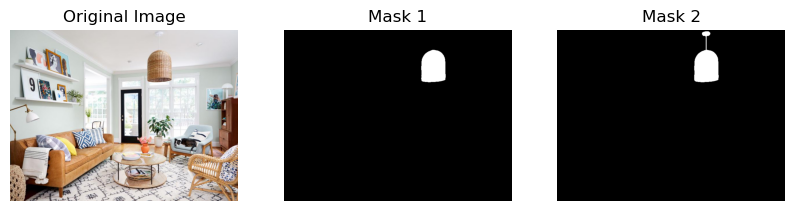

In [31]:
plt.figure(figsize=(10, 5))
plt.subplot(1, len(masks) + 1, 1)
plt.imshow(np.array(image))
plt.title('Original Image')
plt.axis('off')

for i, mask_info in enumerate(masks):
    mask = mask_info['segmentation']
    if isinstance(mask, dict):
        mask = mask_utils.decode(mask)
    plt.subplot(1, len(masks) + 1, i + 2)
    plt.imshow(np.array(mask), cmap='gray')
    plt.title(f'Mask {i+1}')
    plt.axis('off')

plt.show()

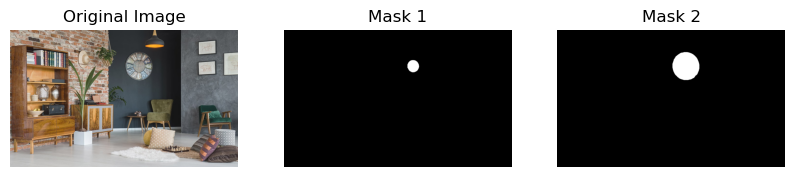

In [32]:
plt.figure(figsize=(10, 5))
plt.subplot(1, len(masksroom4) + 1, 1)
plt.imshow(np.array(room4))
plt.title('Original Image')
plt.axis('off')

for i, mask_info in enumerate(masksroom4):
    mask = mask_info['segmentation']
    if isinstance(mask, dict):
        mask = mask_utils.decode(masksroom4)
    plt.subplot(1, len(masksroom4) + 1, i + 2)
    plt.imshow(np.array(mask), cmap='gray')
    plt.title(f'Mask {i+1}')
    plt.axis('off')

plt.show()

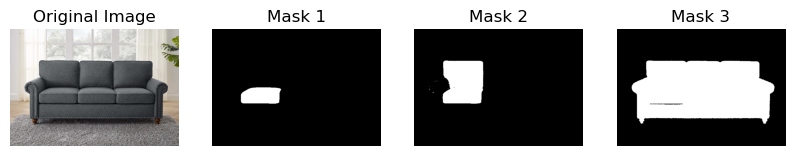

In [33]:
plt.figure(figsize=(10, 5))
plt.subplot(1, len(masks_couch10) + 1, 1)
plt.imshow(np.array(couch10))
plt.title('Original Image')
plt.axis('off')

for i, mask_info in enumerate(masks_couch10):
    mask = mask_info['segmentation']
    if isinstance(mask, dict):
        mask = mask_utils.decode(mask)
    plt.subplot(1, len(masks_couch10) + 1, i + 2)
    plt.imshow(np.array(mask), cmap='gray')
    plt.title(f'Mask {i+1}')
    plt.axis('off')

plt.show()

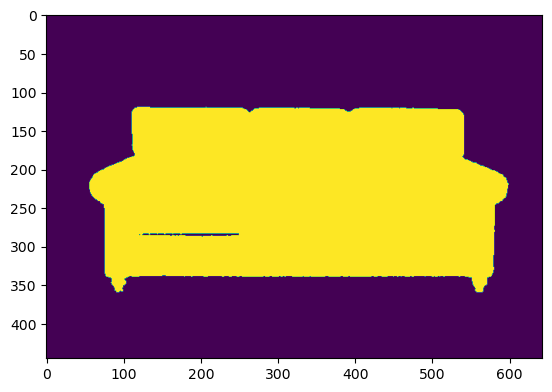

{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 106263, 'bbox': [56, 120, 543, 239], 'predicted_iou': 0.8226417303085327, 'point_coords': [[250.0, 250.00000000000003]], 'stability_score': 0.9663165807723999, 'crop_box': [0, 0, 643, 445]}


In [34]:
plt.imshow(masks_couch10[2]['segmentation'])
plt.show()
print(masks_couch10[2])

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


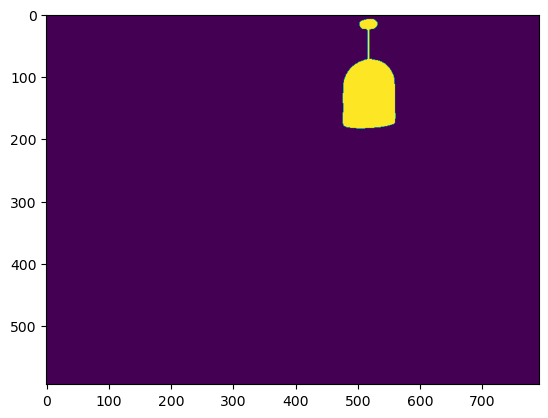

In [35]:
image = image
mask = masks[1]['segmentation']
print(mask)
plt.imshow(mask)


In [36]:
# couchmask = maskscouch[0]['segmentation']

In [37]:
def expand_mask(mask, expand_size):
    height, width = mask.shape
    expanded_mask = np.zeros_like(mask)

    for y in range(height):
        for x in range(width):
            if mask[y, x] == 1:  # Check if the current pixel is part of the mask
                top = max(0, y - expand_size)
                bottom = min(height, y + expand_size + 1)
                left = max(0, x - expand_size)
                right = min(width, x + expand_size + 1)
                expanded_mask[top:bottom, left:right] = 1

    return expanded_mask


expand_size = 10
expanded_mask = expand_mask(mask, expand_size)

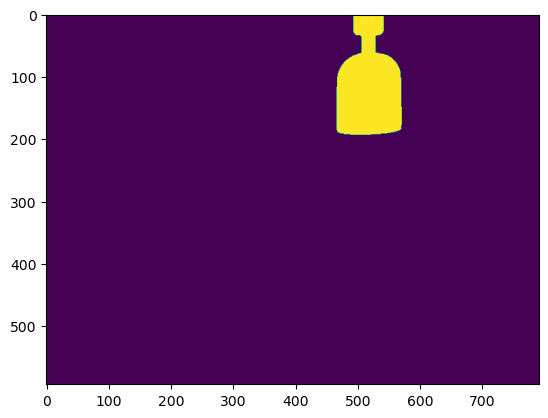

In [38]:
plt.imshow(expanded_mask)
plt.show()

In [39]:
simple_lama = SimpleLama()

image_array = np.array(image)

if image_array.dtype != np.uint8:
    image_array = (image_array * 255).astype(np.uint8)

expanded_mask_array = np.array(expanded_mask)
if expanded_mask_array.dtype != np.uint8:
    expanded_mask_array = (expanded_mask_array * 255).astype(np.uint8)

result = simple_lama(image_array, expanded_mask_array)

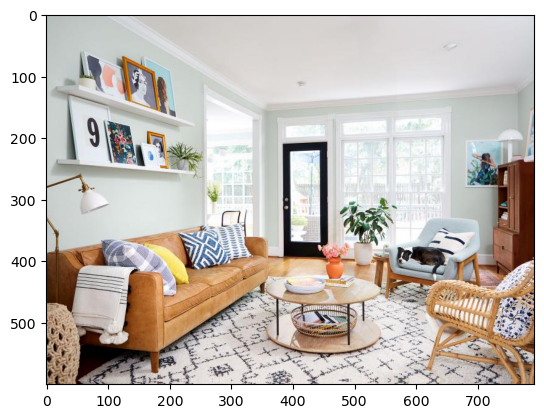

In [40]:
plt.imshow(result)
plt.show()

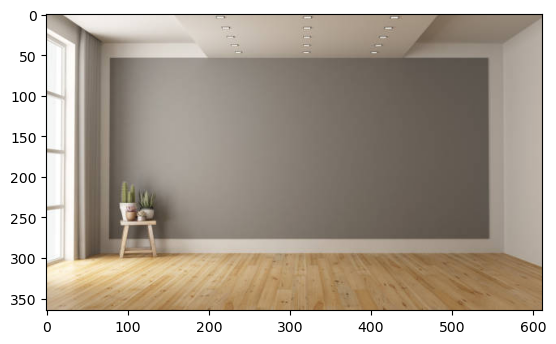

In [41]:
image_path = r"Project_Files\room2.jpg"

image2 = Image.open(image_path)

plt.imshow(image2)
# plt.axis('off')
plt.show()

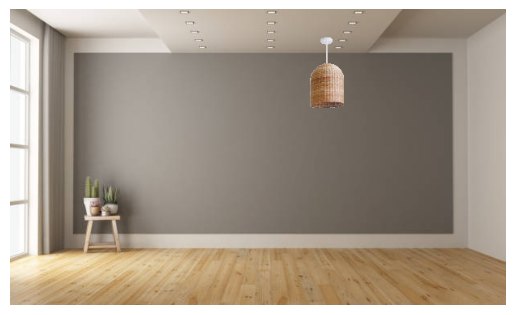

True

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'masks' and 'image files' are appropriately defined and available
image1 = cv2.imread(r"Project_Files\room.jpeg")
image2 = cv2.imread(r"Project_Files\room2.jpg")

# Assuming 'masks' is a list of dictionaries, each containing 'segmentation' and 'bbox'
mask = masks[1]['segmentation']  # Example mask
bbox = masks[1]['bbox']  # Example bounding box

cropped_mask = mask[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]
cropped_mask = (cropped_mask > 0).astype('uint8') * 255

cropped_image1 = image1[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]
scale_factor = 0.5

# Resizing the cropped image and mask
resized_cropped_image1 = cv2.resize(cropped_image1, (int(cropped_image1.shape[1] * scale_factor), int(cropped_image1.shape[0] * scale_factor)))
resized_cropped_mask = cv2.resize(cropped_mask, (int(cropped_mask.shape[1] * scale_factor), int(cropped_mask.shape[0] * scale_factor)))

# Creating a masked source image
masked_source = cv2.bitwise_and(resized_cropped_image1, resized_cropped_image1, mask=resized_cropped_mask)
start_x, start_y = 370, 35
end_y = start_y + masked_source.shape[0]
end_x = start_x + masked_source.shape[1]

# Applying the masked source image to the destination image
mask = np.any(masked_source != [0, 0, 0], axis=-1)
image2[start_y:end_y, start_x:end_x][mask] = masked_source[mask]

# Convert image from BGR to RGB for display in Matplotlib
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

plt.imshow(image2_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

output_filename = 'images/outputs/Lamp_without_texture.jpg'
cv2.imwrite(output_filename, image2)


True

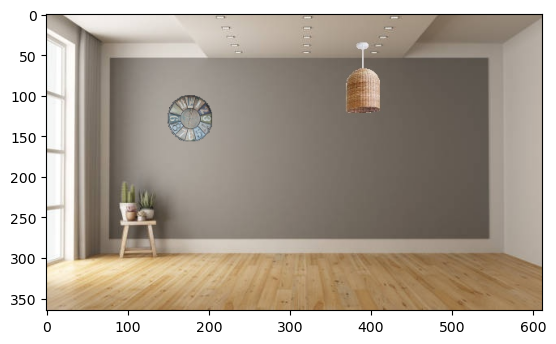

In [43]:
import cv2
import numpy as np

# Load images
image1 = cv2.imread(r"Project_Files\room4.jpg")
image2 = cv2.imread('images/outputs/Lamp_without_texture.jpg')      #load image with lamp

# Assuming maskscouch and bbox information is properly defined somewhere in your script
mask_coffee = masksroom4[1]['segmentation']
bbox_coffee = masksroom4[1]['bbox']

# Process the mask and image for the coffee table
cropped_mask = mask_coffee[bbox_coffee[1]:bbox_coffee[1]+bbox_coffee[3], bbox_coffee[0]:bbox_coffee[0]+bbox_coffee[2]]
cropped_image = image1[bbox_coffee[1]:bbox_coffee[1]+bbox_coffee[3], bbox_coffee[0]:bbox_coffee[0]+bbox_coffee[2]]
cropped_mask = (cropped_mask > 0).astype('uint8') * 255

# Resize the cropped image and mask
scale_factor = 0.5
resized_image = cv2.resize(cropped_image, (int(cropped_image.shape[1] * scale_factor), int(cropped_image.shape[0] * scale_factor)))
resized_mask = cv2.resize(cropped_mask, (int(cropped_mask.shape[1] * scale_factor), int(cropped_mask.shape[0] * scale_factor)))

# Extract the coffee table using the mask
table_extracted = cv2.bitwise_and(resized_image, resized_image, mask=resized_mask)

# Positioning the extracted table in the second image
start_x, start_y = 150, 100
end_x = start_x + table_extracted.shape[1]
end_y = start_y + table_extracted.shape[0]
image2[start_y:end_y, start_x:end_x] = image2[start_y:end_y, start_x:end_x] * (1 - (resized_mask > 0)[:, :, None]) + table_extracted

# Show the final image
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

# Save the final image
save_path = 'images/outputs/LampNlight_without_texture.jpg'
cv2.imwrite(save_path, image2)

True

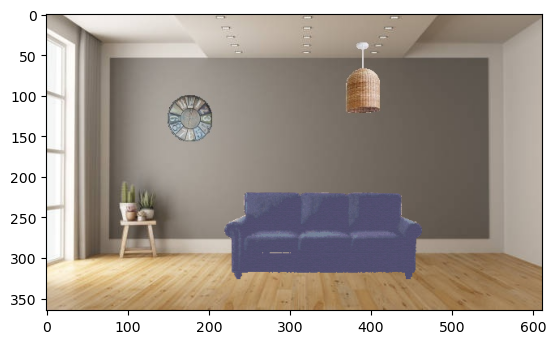

In [44]:
import cv2
import numpy as np

# Load images
image1 = cv2.imread('images/outputs/final_output_textureTransfer.jpg')
# image1 = cv2.imread(r"Project_Files\better_sofa.jpg")  # Load the coffee table image
image2 = cv2.imread('images/outputs/LampNlight_without_texture.jpg')  # Load the room image

mask_coffee = masks_couch10[2]['segmentation']
bbox_coffee = masks_couch10[2]['bbox']

cropped_mask = mask_coffee[bbox_coffee[1]:bbox_coffee[1]+bbox_coffee[3], bbox_coffee[0]:bbox_coffee[0]+bbox_coffee[2]]
cropped_image = image1[bbox_coffee[1]:bbox_coffee[1]+bbox_coffee[3], bbox_coffee[0]:bbox_coffee[0]+bbox_coffee[2]]

cropped_mask = (cropped_mask > 0).astype('uint8') * 255

scale_factor = 0.45
resized_image = cv2.resize(cropped_image, (int(cropped_image.shape[1] * scale_factor), int(cropped_image.shape[0] * scale_factor)))
resized_mask = cv2.resize(cropped_mask, (int(cropped_mask.shape[1] * scale_factor), int(cropped_mask.shape[0] * scale_factor)))
couch_mask = resized_mask

table_extracted = cv2.bitwise_and(resized_image, resized_image, mask=resized_mask)


start_x, start_y = 220, 220
end_x = start_x + table_extracted.shape[1]
end_y = start_y + table_extracted.shape[0]

start_x_couch, start_y_couch = start_x, start_y

image2[start_y:end_y, start_x:end_x] = image2[start_y:end_y, start_x:end_x] * (1 - (resized_mask > 0)[:, :, None]) + table_extracted

# Show the final image
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

# Save the final image
save_path = 'images/outputs/LampNlightNcouch_without_texture.jpg'
cv2.imwrite(save_path, image2)

In [45]:
def ssd_patch(T,M,I,target_patch = None, alpha = 0.5):
    if target_patch is not None:
        target_patch = target_patch.astype(np.float32)
    I = I.astype(np.float32)
    
    ssd_cost_red = ((M*T[:,:,0])**2).sum() - 2 * cv2.filter2D(I[:,:,0], ddepth=-1, kernel = M*T[:,:,0]) + cv2.filter2D(I[:,:,0] ** 2, ddepth=-1, kernel=M)
    ssd_cost_green = ((M*T[:,:,1])**2).sum() - 2 * cv2.filter2D(I[:,:,1], ddepth=-1, kernel = M*T[:,:,1]) + cv2.filter2D(I[:,:,1] ** 2, ddepth=-1, kernel=M)
    ssd_cost_blue = ((M*T[:,:,2])**2).sum() - 2 * cv2.filter2D(I[:,:,2], ddepth=-1, kernel = M*T[:,:,2]) + cv2.filter2D(I[:,:,2] ** 2, ddepth=-1, kernel=M)

    ssd_cost = ssd_cost_red + ssd_cost_green + ssd_cost_blue
    
    if target_patch is not None:
        M = np.ones_like(M)
        target_ssd_cost_red = ((M*target_patch[:,:,0])**2).sum() - 2 * cv2.filter2D(I[:,:,0], ddepth=-1, kernel = M*target_patch[:,:,0]) + cv2.filter2D(I[:,:,0] ** 2, ddepth=-1, kernel=M)
        target_ssd_cost_green = ((M*target_patch[:,:,1])**2).sum() - 2 * cv2.filter2D(I[:,:,1], ddepth=-1, kernel = M*target_patch[:,:,1]) + cv2.filter2D(I[:,:,1] ** 2, ddepth=-1, kernel=M)
        target_ssd_cost_blue = ((M*target_patch[:,:,2])**2).sum() - 2 * cv2.filter2D(I[:,:,2], ddepth=-1, kernel = M*target_patch[:,:,2]) + cv2.filter2D(I[:,:,2] ** 2, ddepth=-1, kernel=M)

        target_ssd_cost = target_ssd_cost_red + target_ssd_cost_green + target_ssd_cost_blue
        ssd_cost = ssd_cost + (alpha * target_ssd_cost)
    
    return ssd_cost

def choose_sample(cost, patch_size, tol): 
    pad = patch_size // 2

    mask = np.ones_like(cost, dtype=bool)
    mask[pad:-pad, pad:-pad] = False

    cost_img_masked = np.copy(cost)
    cost_img_masked[mask] = np.inf

    flat_cost_img_masked = cost_img_masked.flatten()

    sorted_indices = np.argsort(flat_cost_img_masked)
    top_indices = sorted_indices[:tol]

    chosen_index = np.random.choice(top_indices)

    min_val_index_masked = np.unravel_index(chosen_index, cost_img_masked.shape)

    row, column = min_val_index_masked
    
    return row, column


def texture_transfer(sample, patch_size, overlap, tol, guidance_im, alpha):
    out_size = guidance_im.shape
    out_image_arr = np.zeros((out_size[0]+patch_size, out_size[1]+patch_size, 3), dtype = np.float32)
        
    for y in tqdm.tqdm(range(0, out_size[0]-patch_size, patch_size - overlap)):
        for x in range(0, out_size[1]-patch_size, patch_size - overlap):
            
            
            if y == 0 and x == 0:
                row, col = np.random.randint(0, sample.shape[0] - patch_size), np.random.randint(0, sample.shape[1] - patch_size)
                row, col = 0,0
                patch = sample[row:row+patch_size, col:col+patch_size]    
                out_image_arr[y:y+patch_size,x:x+patch_size,:] = patch
                continue
                
            template = np.zeros((patch_size, patch_size, 3), dtype = np.float32)
            mask = np.zeros((patch_size, patch_size), dtype = np.float32)
            horizontal_mask = None
            vertical_mask = None
            
            if y > 0:
                template[:overlap, :, :] = out_image_arr[y-overlap:y, x:x+patch_size, :]
                mask[:overlap, :] = 1

            if x > 0:
                template[:, :overlap, :] = out_image_arr[y:y+patch_size, x-overlap:x, :]
                mask[:, :overlap] = 1
            
            guidance_template = guidance_im[y:y+patch_size, x:x+patch_size, :]
            ssd_cost = ssd_patch(template, mask, sample, guidance_template, alpha)
            row, col = choose_sample(ssd_cost, patch_size, tol)
            
            
            patch = sample[row-patch_size//2:row+patch_size//2+1, col-patch_size//2:col+patch_size//2+1, :]

            mask = None
            combined_mask = None
                 
            if (y > 0):
                horizontal_overlap_existing = out_image_arr[y:y+overlap, x:x+patch_size, :]
                horizontal_overlap_patch = patch[:overlap, :, :]
                horizontal_error = np.sum(np.square(horizontal_overlap_existing - horizontal_overlap_patch), axis=2)
                
                horizontal_mask = np.ones((patch_size, patch_size))
                horizontal_mask[:overlap, :] = cut(horizontal_error)
                
                mask = horizontal_mask
                
            if (x > 0):
                vertical_overlap_existing = out_image_arr[y:y+patch_size, x:x+overlap, :]
                vertical_overlap_patch = patch[:, :overlap, :]
                vertical_error = np.sum(np.square(vertical_overlap_existing - vertical_overlap_patch), axis=2)

                vertical_mask = np.ones((patch_size, patch_size))
                vertical_mask[:, :overlap] = cut(vertical_error.T).T
                
                mask = vertical_mask
                    
                
            if (x > 0 and y > 0):
                combined_mask = np.logical_and(horizontal_mask, vertical_mask)  
                mask = combined_mask

                
            for i in range(3): 
                out_image_arr[y:y+patch_size, x:x+patch_size, i] = (mask * patch[:,:,i] + 
                                                                 (1-mask) * out_image_arr[y:y+patch_size, x:x+patch_size, i]
                                                                )
                
    return out_image_arr[:out_size[0]-patch_size,:out_size[1]-patch_size,:]

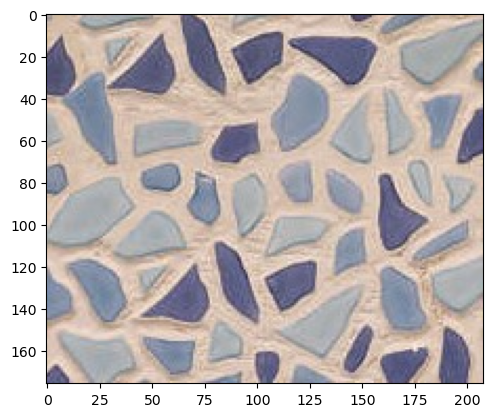

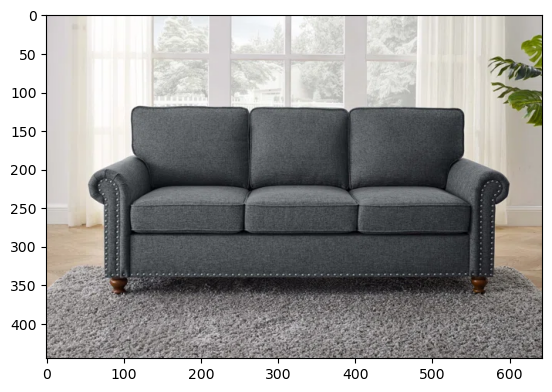

100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [01:57<00:00,  1.07s/it]


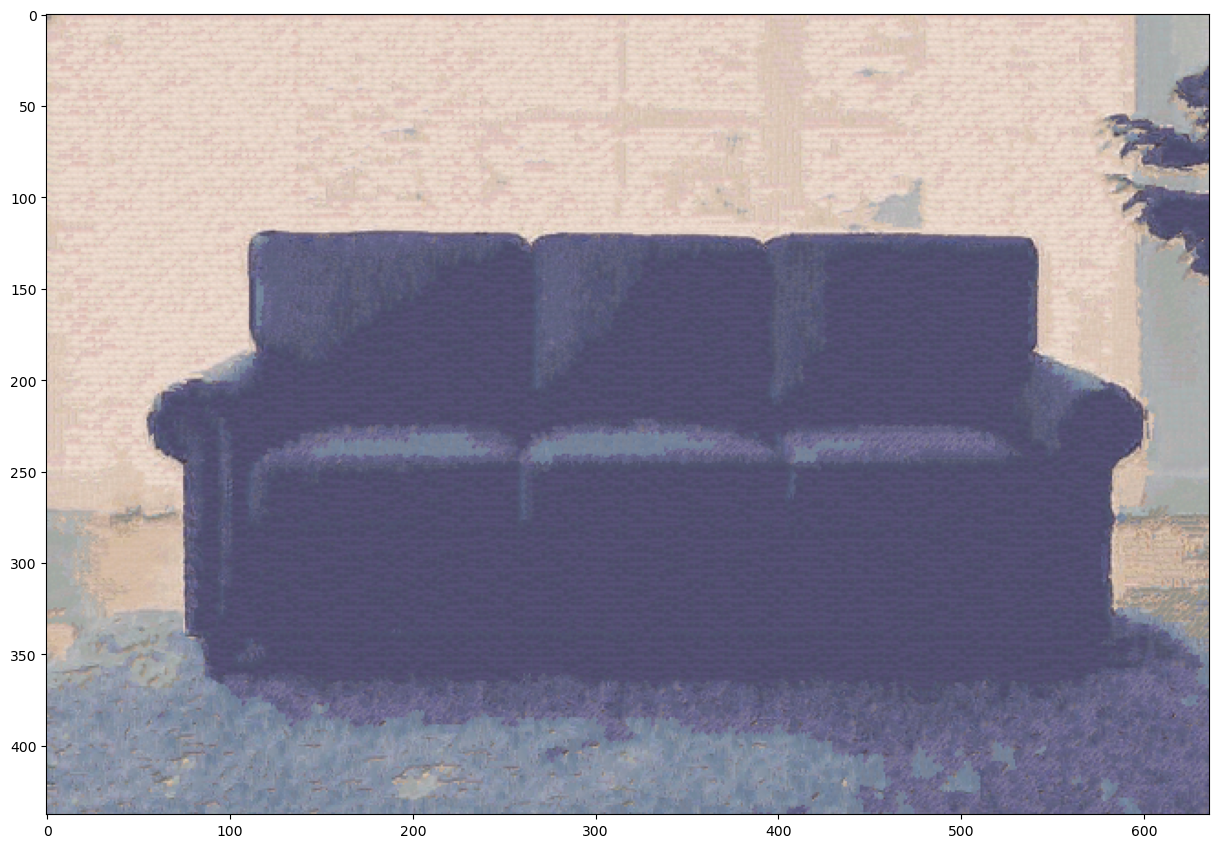

True

In [46]:
texture_img_fn = 'Project_Files/tile.jpg'
texture_img = cv2.cvtColor(cv2.imread(texture_img_fn), cv2.COLOR_BGR2RGB)
guidance_img_fn = r"Project_Files\better_sofa.jpg"
guidance_img = cv2.cvtColor(cv2.imread(guidance_img_fn), cv2.COLOR_BGR2RGB)
# guidance_img = cv2.resize(guidance_img, (guidance_img.shape[1] * 3, guidance_img.shape[0] * 3))

plt.imshow(texture_img)
plt.show()
plt.imshow(guidance_img)
plt.show()

patch_size = 7
overlap = 3
tol = 5
alpha = 0.95
res = texture_transfer(texture_img, patch_size, overlap, tol, guidance_img, alpha)

plt.figure(figsize=(15,15))
plt.imshow(res.astype(np.uint8))
plt.show()
# Convert the result from RGB to BGR
res_bgr = cv2.cvtColor(res.astype(np.uint8), cv2.COLOR_RGB2BGR)

# Save the image
output_filename = 'images/outputs/final_output_textureTransfer.jpg'  # Specify your output directory and file name
cv2.imwrite(output_filename, res_bgr)

## Texture Transfer using cropped mask

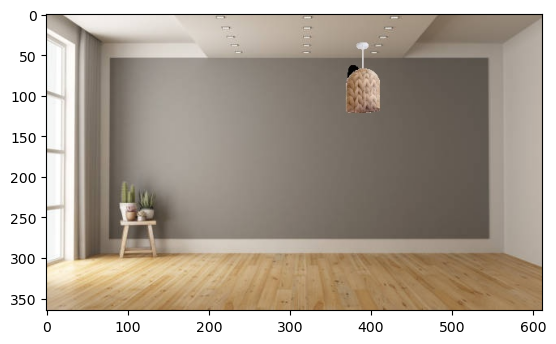

In [47]:
import cv2
import numpy as np
# from google.colab.patches import cv2_imshow  # Import cv2_imshow to replace cv2.imshow

image1 = cv2.imread('Project_Files/room.jpeg')
image2 = cv2.imread('Project_Files/room2.jpg')

mask = masks[1]['segmentation']
bbox = masks[1]['bbox']

cropped_mask = mask[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]
cropped_mask = (cropped_mask > 0).astype('uint8') * 255

cropped_image1 = image1[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]
scale_factor = 0.5

resized_cropped_image1 = cv2.resize(cropped_image1, (int(cropped_image1.shape[1] * scale_factor), int(cropped_image1.shape[0] * scale_factor)))
resized_cropped_mask = cv2.resize(cropped_mask, (int(cropped_mask.shape[1] * scale_factor), int(cropped_mask.shape[0] * scale_factor)))

masked_source = cv2.bitwise_and(resized_cropped_image1, resized_cropped_image1, mask=resized_cropped_mask)
start_x, start_y = 370, 35
end_y = start_y + masked_source.shape[0]
end_x = start_x + masked_source.shape[1]

texture_transfer = True

if not texture_transfer:
    mask = np.any(masked_source != [0, 0, 0], axis=-1)
    image2[start_y:end_y, start_x:end_x][mask] = masked_source[mask]
else:
    texture_image = cv2.imread('Project_Files/texture.png')
    texture_image = cv2.resize(texture_image, (masked_source.shape[1], masked_source.shape[0]))
    textured_object = cv2.seamlessClone(texture_image, masked_source, resized_cropped_mask, (masked_source.shape[1]//2, masked_source.shape[0]//2), cv2.NORMAL_CLONE)
    mask = np.any(textured_object != [0, 0, 0], axis=-1)
    image2[start_y:end_y, start_x:end_x][mask] = textured_object[mask]

output_filename = 'images/outputs/texture_transfer_lamp.jpg'
cv2.imwrite(output_filename, image2)
output_image = Image.open('images/outputs/texture_transfer_lamp.jpg')

plt.imshow(output_image)
plt.show()

## Texture Transfer using Poisson Blending

Solution range: -551982660.0 -462421600.0


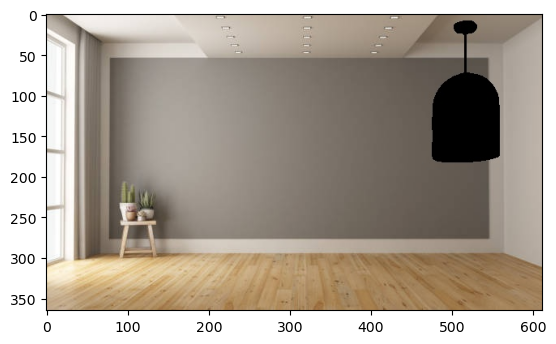

In [48]:
import cv2
import numpy as np
from scipy.sparse import lil_matrix, csr_matrix
from scipy.sparse.linalg import spsolve

def poisson_blend(img_target, img_source, img_mask, offset):
    off_y, off_x = offset
    y_indices, x_indices = np.nonzero(img_mask)
    num_pixels = len(y_indices)
    A = lil_matrix((num_pixels, num_pixels), dtype=np.float32)
    b = np.zeros((num_pixels, 3), dtype=np.float32)

    index_mapping = {idx: i for i, idx in enumerate(zip(y_indices, x_indices))}

    for i, (y, x) in enumerate(zip(y_indices, x_indices)):
        connections = 0
        neighbors = [(y, x - 1), (y, x + 1), (y - 1, x), (y + 1, x)]
        for ny, nx in neighbors:
            if (ny, nx) in index_mapping:
                A[i, index_mapping[(ny, nx)]] = -1
                connections += 1
            else:
                ny_global, nx_global = ny + off_y, nx + off_x
                if 0 <= ny_global < img_target.shape[0] and 0 <= nx_global < img_target.shape[1]:
                    b[i] += img_target[ny_global, nx_global].astype(np.float32)
                else:
                    b[i] += img_source[ny, nx].astype(np.float32)
        A[i, i] = connections

    solution_vectors = np.zeros((num_pixels, 3), dtype=np.float32)
    for k in range(3):
        solution = spsolve(A.tocsr(), b[:, k])
        solution_vectors[:, k] = solution

    print("Solution range:", np.min(solution_vectors), np.max(solution_vectors))

    # Applying the solution
    for idx, (y, x) in enumerate(zip(y_indices, x_indices)):
        img_target[y + off_y, x + off_x] = np.clip(solution_vectors[idx], 0, 255).astype(np.uint8)


# Read images and mask
image1 = cv2.imread('Project_Files/room.jpeg')
image2 = cv2.imread('Project_Files/room2.jpg')
texture_image = cv2.imread('Project_Files/texture.png')

# Segment information
mask = masks[1]['segmentation']
bbox = masks[1]['bbox']

# Preparing the mask and the source area for blending
cropped_mask = mask[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]
cropped_mask = (cropped_mask > 0).astype('uint8') * 255
cropped_image1 = image1[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]

# Resize texture to fit the cropped mask
texture_resized = cv2.resize(texture_image, (cropped_image1.shape[1], cropped_image1.shape[0]))

# Perform Poisson blending
poisson_blend(image2, texture_resized, cropped_mask, (bbox[1], bbox[0]))

# Save and display the output
output_filename = 'images/outputs/texture_transfer_lamp_blending.jpg'
cv2.imwrite(output_filename, image2)
output_image = Image.open(output_filename)

plt.imshow(output_image)
plt.show()


## Texture Transfer using Alpha Blending

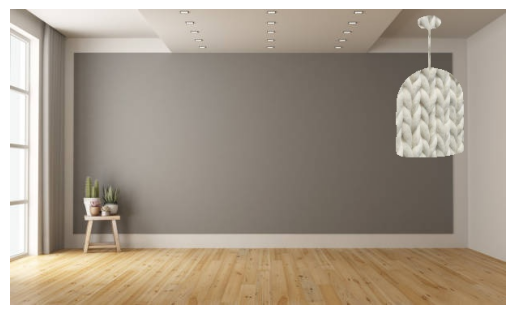

In [49]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def alpha_blend(img_target, img_source, img_mask, offset):
    off_y, off_x = offset
    for y in range(img_mask.shape[0]):
        for x in range(img_mask.shape[1]):
            if img_mask[y, x]:
                alpha = img_mask[y, x] / 255.0
                # Manually blend each channel
                for c in range(3):  # Assuming both images are in BGR format
                    img_target[off_y + y, off_x + x, c] = (
                        img_target[off_y + y, off_x + x, c] * (1 - alpha) +
                        img_source[y, x, c] * alpha
                    )

# Read images and mask
image1 = cv2.imread('Project_Files/room.jpeg')
image2 = cv2.imread('Project_Files/room2.jpg')
texture_image = cv2.imread('Project_Files/texture.png')

# Segment information and mask processing
mask = masks[1]['segmentation']
bbox = masks[1]['bbox']

# Prepare the mask and the source area for blending
cropped_mask = mask[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]
cropped_mask = (cropped_mask > 0).astype('uint8') * 255
cropped_texture = cv2.resize(texture_image, (cropped_mask.shape[1], cropped_mask.shape[0]))

# Perform alpha blending
alpha_blend(image2, cropped_texture, cropped_mask, (bbox[1], bbox[0]))

# Save and display the output
output_filename = 'images/outputs/texture_transfer_lamp_blending.jpg'
cv2.imwrite(output_filename, image2)
output_image = Image.open(output_filename)

plt.imshow(output_image)
plt.axis('off')  # Hide axes ticks
plt.show()




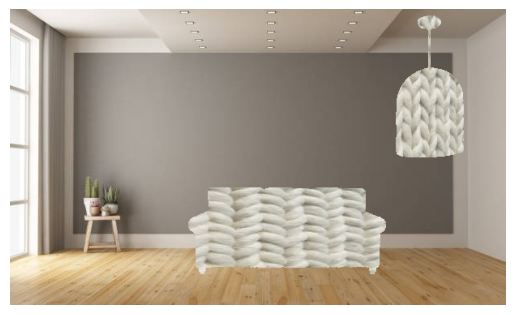

In [50]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def alpha_blend(img_target, img_source, img_mask, offset):
    off_y, off_x = offset
    for y in range(img_mask.shape[0]):
        for x in range(img_mask.shape[1]):
            if img_mask[y, x]:
                alpha = img_mask[y, x] / 255.0
                # Manually blend each channel
                for c in range(3):  # Assuming both images are in BGR format
                    img_target[off_y + y, off_x + x, c] = (
                        img_target[off_y + y, off_x + x, c] * (1 - alpha) +
                        img_source[y, x, c] * alpha
                    )

# Read images and mask
image1 = cv2.imread('Project_Files/better_sofa.jpeg')
image2 = cv2.imread('images/outputs/texture_transfer_lamp_blending.jpg')
texture_image = cv2.imread('Project_Files/texture.png')

# Segment information and mask processing
mask = masks_couch10[2]['segmentation']
bbox = masks_couch10[2]['bbox']

# Prepare the mask and the source area for blending
cropped_mask = mask[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]

cropped_mask = couch_mask
cropped_mask = (cropped_mask > 0).astype('uint8') * 255
cropped_texture = cv2.resize(texture_image, (cropped_mask.shape[1], cropped_mask.shape[0]))

# Perform alpha blending
alpha_blend(image2, cropped_texture, cropped_mask, (start_x_couch, start_y_couch))

# Save and display the output
output_filename = 'images/outputs/texture_transfer_couch_blending.jpg'
cv2.imwrite(output_filename, image2)
output_image = Image.open(output_filename)

plt.imshow(output_image)
plt.axis('off')  # Hide axes ticks
plt.show()



In [51]:
# import cv2
# import numpy as np
# # from google.colab.patches import cv2_imshow

# # Load images
# image1 = cv2.imread('/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/room4.jpg')  # Load the coffee table image
# image2 = cv2.imread('/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/room4.jpg')          # Load the room image

# # Assuming maskscouch and bbox information is properly defined somewhere in your script
# mask_coffee = maskscouch[1]['segmentation']
# bbox_coffee = maskscouch[1]['bbox']

# # Process the mask and image for the coffee table
# cropped_mask = mask_coffee[bbox_coffee[1]:bbox_coffee[1]+bbox_coffee[3], bbox_coffee[0]:bbox_coffee[0]+bbox_coffee[2]]
# cropped_image = image1[bbox_coffee[1]:bbox_coffee[1]+bbox_coffee[3], bbox_coffee[0]:bbox_coffee[0]+bbox_coffee[2]]
# cropped_mask = (cropped_mask > 0).astype('uint8') * 255

# # Resize the cropped image and mask
# scale_factor = 0.5
# resized_image = cv2.resize(cropped_image, (int(cropped_image.shape[1] * scale_factor), int(cropped_image.shape[0] * scale_factor)))
# resized_mask = cv2.resize(cropped_mask, (int(cropped_mask.shape[1] * scale_factor), int(cropped_mask.shape[0] * scale_factor)))

# # Extract the coffee table using the mask
# table_extracted = cv2.bitwise_and(resized_image, resized_image, mask=resized_mask)

# # Positioning the extracted table in the second image
# start_x, start_y = 150, 100
# end_x = start_x + table_extracted.shape[1]
# end_y = start_y + table_extracted.shape[0]
# image2[start_y:end_y, start_x:end_x] = image2[start_y:end_y, start_x:end_x] * (1 - (resized_mask > 0)[:, :, None]) + table_extracted

# # Show the final image
# # cv2_imshow(image2)

# # Save the final image
# save_path = '/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/images/outputs/final_composed_image.jpg'
# cv2.imwrite(save_path, image2)
# output_image = Image.open(save_path)

# plt.imshow(output_image)
# plt.show()

In [52]:
# import cv2
# import numpy as np
# # from google.colab.patches import cv2_imshow

# # Load images
# image1 = cv2.imread('/content/drive/My Drive/room4.jpg')  # Load the coffee table image
# image2 = cv2.imread('/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/room4.jpg')          # Load the room image

# # Assuming maskstable and bounding box information is correctly provided
# mask_coffee = maskstable[1]['segmentation']
# bbox_coffee = maskstable[1]['bbox']

# cropped_mask = mask_coffee[bbox_coffee[1]:bbox_coffee[1]+bbox_coffee[3], bbox_coffee[0]:bbox_coffee[0]+bbox_coffee[2]]
# cropped_image = image1[bbox_coffee[1]:bbox_coffee[1]+bbox_coffee[3], bbox_coffee[0]:bbox_coffee[0]+bbox_coffee[2]]

# cropped_mask = (cropped_mask > 0).astype('uint8') * 255

# scale_factor = 0.5
# resized_image = cv2.resize(cropped_image, (int(cropped_image.shape[1] * scale_factor), int(cropped_image.shape[0] * scale_factor)))
# resized_mask = cv2.resize(cropped_mask, (int(cropped_mask.shape[1] * scale_factor), int(cropped_mask.shape[0] * scale_factor)))

# table_extracted = cv2.bitwise_and(resized_image, resized_image, mask=resized_mask)

# start_x, start_y = 515, 140
# end_x = start_x + table_extracted.shape[1]
# end_y = start_y + table_extracted.shape[0]

# image2[start_y:end_y, start_x:end_x] = image2[start_y:end_y, start_x:end_x] * (1 - (resized_mask > 0)[:, :, None]) + table_extracted

# # Display the final image
# cv2_imshow(image2)

# # Save the final image to disk
# save_path = '/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/images/outputs'
# cv2.imwrite(save_path, image2)
# print("Image saved successfully at:", save_path)


In [53]:
# import cv2
# import numpy as np
# from google.colab.patches import cv2_imshow

# # Load images
# image1 = cv2.imread('/content/drive/My Drive/better_sofa.jpg')  # Load the coffee table image
# image2 = cv2.imread('/content/drive/My Drive/final_output_image2.jpg')          # Load the room image

# mask_coffee = masks_couch10[2]['segmentation']
# bbox_coffee = masks_couch10[2]['bbox']

# cropped_mask = mask_coffee[bbox_coffee[1]:bbox_coffee[1]+bbox_coffee[3], bbox_coffee[0]:bbox_coffee[0]+bbox_coffee[2]]
# cropped_image = image1[bbox_coffee[1]:bbox_coffee[1]+bbox_coffee[3], bbox_coffee[0]:bbox_coffee[0]+bbox_coffee[2]]

# cropped_mask = (cropped_mask > 0).astype('uint8') * 255

# scale_factor = 0.45
# resized_image = cv2.resize(cropped_image, (int(cropped_image.shape[1] * scale_factor), int(cropped_image.shape[0] * scale_factor)))
# resized_mask = cv2.resize(cropped_mask, (int(cropped_mask.shape[1] * scale_factor), int(cropped_mask.shape[0] * scale_factor)))

# table_extracted = cv2.bitwise_and(resized_image, resized_image, mask=resized_mask)

# start_x, start_y = 220, 220
# end_x = start_x + table_extracted.shape[1]
# end_y = start_y + table_extracted.shape[0]

# image2[start_y:end_y, start_x:end_x] = image2[start_y:end_y, start_x:end_x] * (1 - (resized_mask > 0)[:, :, None]) + table_extracted

# cv2_imshow(image2)


In [ ]:
import cv2
import numpy as np
import scipy.sparse
import scipy.sparse.linalg

def blender(object_img, object_mask, bg_img, bg_ul):
    # Crop the object image and mask according to the bounding box
    object_height, object_width, _ = object_img.shape
    bg_height, bg_width, _ = bg_img.shape
    ii, jj = np.nonzero(object_mask)
    num_pixels = len(ii)
    ii += bg_ul[0]  # Adjust indices based on the upper-left position
    jj += bg_ul[1]

    # Create the sparse matrix and vector for the linear system
    A = scipy.sparse.lil_matrix((num_pixels, num_pixels))
    b = np.zeros(num_pixels)
    indices = {(i, j): idx for idx, (i, j) in enumerate(zip(ii, jj))}

    # Fill the matrix A and vector b based on the neighbors
    for idx, (i, j) in enumerate(zip(ii, jj)):
        neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
        for ni, nj in neighbors:
            if (ni, nj) in indices:
                A[idx, indices[(ni, nj)]] = -1
            A[idx, idx] += 1
            if ni < 0 or nj < 0 or ni >= bg_height or nj >= bg_width:
                pixel_value = bg_img[ni % bg_height, nj % bg_width]
                b[idx] += np.mean(pixel_value)  # Use the average of RGB values
            else:
                if (ni, nj) not in indices:
                    pixel_value = bg_img[ni, nj]
                    b[idx] += np.mean(pixel_value)  # Use the average of RGB values

    # Solve the linear system
    x = scipy.sparse.linalg.lsqr(A, b)[0]

    # Create the result image from the background
    result_img = np.copy(bg_img)
    for idx, val in enumerate(x):
        i, j = ii[idx], jj[idx]
        if 0 <= i < bg_height and 0 <= j < bg_width:
            result_img[i, j] = val  # Assign the grayscale value to all channels

    return result_img

# Example usage

image1 = cv2.imread('Project_Files/room.jpeg')
image2 = cv2.imread('Project_Files/room2.jpg')
bbox = masks[1]['bbox']  # Bounding box from the masks data structure


#[start_y:end_y, start_x:end_x]
newbox = [start_y, start_x, end_y-start_y, end_x-start_x]


result_image = blender(image1, cropped_mask, image2, newbox)

cv2.imshow('Result Image', result_image)
cv2.waitKey(0)